In [2]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('../data/raw/csvs/building_metadata.csv')

<b>I. DataFrame overview</b>

building_meta.csv

 <ul>
    <li>site_id - Foreign key for the weather files.</li>
    <li>building_id - Foreign key for training.csv</li>
    <li>primary_use - Indicator of the primary category of activities for the building based on EnergyStar property type definitions</li>
    <li>square_feet - Gross floor area of the building</li>
    <li>year_built - Year building was opened</li>
    <li>floor_count - Number of floors of the building</li>
</ul> 

In [4]:
df.shape

(1449, 6)

In [5]:
df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [6]:
df.tail()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN
1448,15,1448,Office,92271,2001.0,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
year_built     675 non-null float64
floor_count    355 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [8]:
df.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


<b>II. site_id</b>

In [3]:
#TODO count + histo

<b>III. building_id</b>

In [1]:
#TODO

<b>IV. primary_use</b>

In [9]:
print(df['primary_use'].unique())
print(df['primary_use'].unique().shape)

['Education' 'Lodging/residential' 'Office'
 'Entertainment/public assembly' 'Other' 'Retail' 'Parking'
 'Public services' 'Warehouse/storage' 'Food sales and service'
 'Religious worship' 'Healthcare' 'Utility' 'Technology/science'
 'Manufacturing/industrial' 'Services']
(16,)


In [10]:
df['primary_use'].value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

<b>V. square_feet feature</b>

<b>Descr :</b> "Gross floor area of the building".

Generally, the gross floor area is the sum of the floor areas of the spaces within the building, including basements, mezzanine and intermediate-floored tiers, and penthouses with headroom height of 7.5 ft (2.2 meters) or greater.
[https://www.usgbc.org/help/what-gross-floor-area]

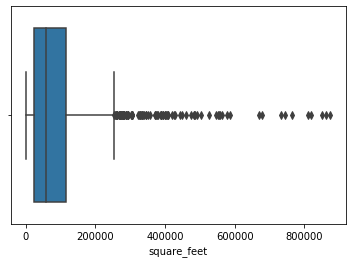

In [11]:
sns.boxplot(df['square_feet'])

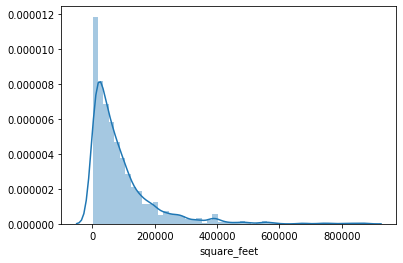

In [12]:
sns.distplot(df['square_feet'])

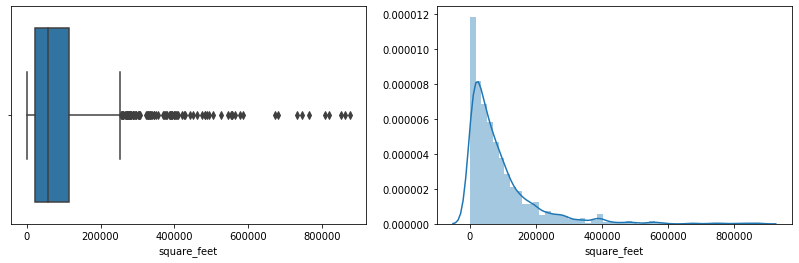

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(df['square_feet'])
plt.subplot(122)
sns.distplot(df['square_feet'])

<b>VI. year_built</b>

In [14]:
# Number of NaNs
df['year_built'].isnull().sum()

774

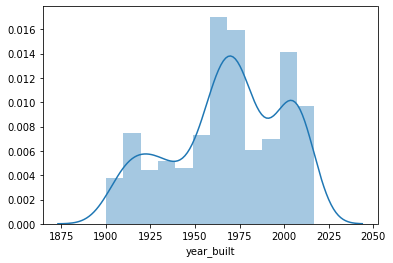

In [15]:
sns.distplot(df['year_built'].dropna())

<b>VII. floor_count</b><br>
<br>
There are a lot of NaNs here. Do they correspond to anything or are they just random missing values ?

In [16]:
# Number of NaNs
n_null = df['floor_count'].isnull().sum()
n = df.shape[0]
print('n_null = {}/{} ({}%)'.format(n_null, n, round(100*n_null/n,2)))

n_null = 1094/1449 (75.5%)


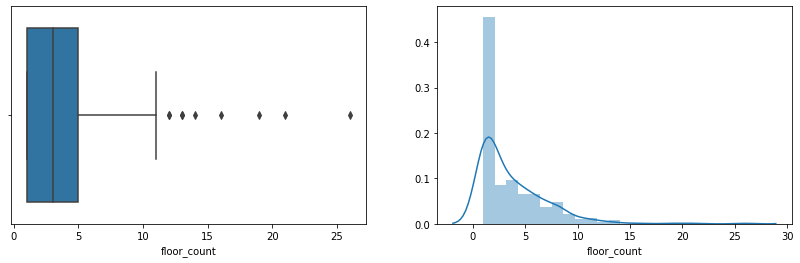

In [17]:
df_floor = df[~df['floor_count'].isnull()]
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(df_floor['floor_count'])
plt.subplot(122)
sns.distplot(df_floor['floor_count'])

See distribution under 10 floors :

In [18]:
df_small = df_floor[df_floor['floor_count']<10]
df_small['floor_count'].value_counts()

1.0    109
2.0     67
4.0     37
3.0     33
6.0     25
5.0     25
8.0     19
7.0     14
9.0      8
Name: floor_count, dtype: int64

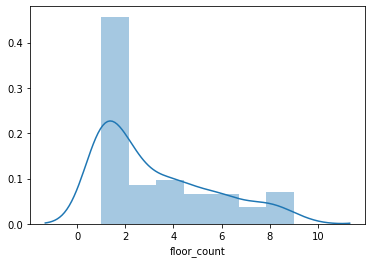

In [19]:
sns.distplot(df_small['floor_count'])

In [20]:
df_no_floor = df[df['floor_count'].isnull()]

In [21]:
# TODO draw distr df_no_floor['primary_use'] vs dist df_floor['primary_use']
# (let's use a seaborn.violinplot for fun ?)
# best of the best : compute https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html
# (but not so important)

In [22]:
df_no_floor['primary_use'].value_counts()

Education                        377
Office                           239
Lodging/residential              129
Entertainment/public assembly    128
Public services                  115
Healthcare                        22
Parking                           19
Other                             12
Warehouse/storage                 11
Services                          10
Retail                             9
Manufacturing/industrial           9
Food sales and service             5
Technology/science                 3
Religious worship                  3
Utility                            3
Name: primary_use, dtype: int64

In [23]:
tips = sns.load_dataset("tips")

In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
df_copy = df.copy()

compute_has_floor = lambda x: 'no' if math.isnan(x) else 'yes'

df_copy['has_floor'] = df_copy['floor_count'].apply(compute_has_floor)

print(df_copy['has_floor'].value_counts())
df_copy.head()

no     1094
yes     355
Name: has_floor, dtype: int64


,site_id,building_id,primary_use,square_feet,year_built,floor_count,has_floor
0,0,0,Education,7432,2008.0,NaN,no
1,0,1,Education,2720,2004.0,NaN,no
2,0,2,Education,5376,1991.0,NaN,no
3,0,3,Education,23685,2002.0,NaN,no
4,0,4,Education,116607,1975.0,NaN,no


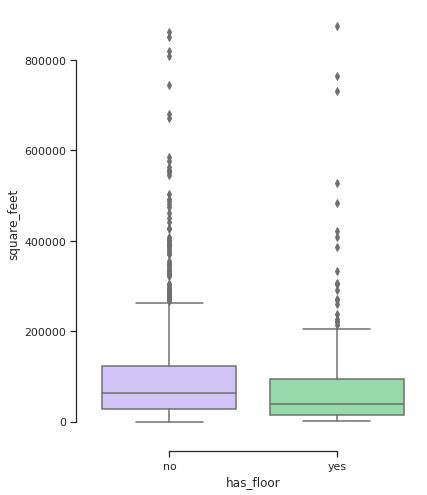

In [26]:
sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot
plt.figure(figsize=(6,8))
sns.boxplot(x="has_floor", y="square_feet",
            palette=["m", "g"],
            data=df_copy)
sns.despine(offset=10, trim=True)

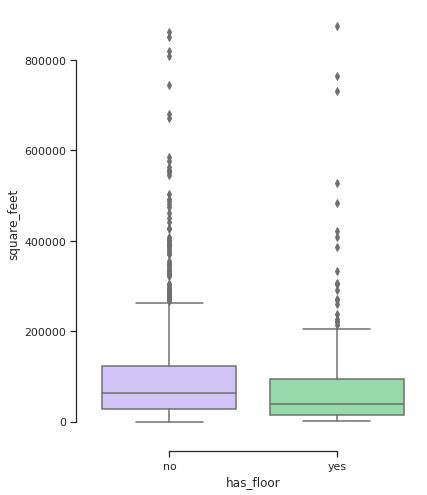

In [27]:
sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot
plt.figure(figsize=(6,8))
sns.boxplot(x="has_floor", y="square_feet",
            palette=["m", "g"],
            data=df_copy)
sns.despine(offset=10, trim=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

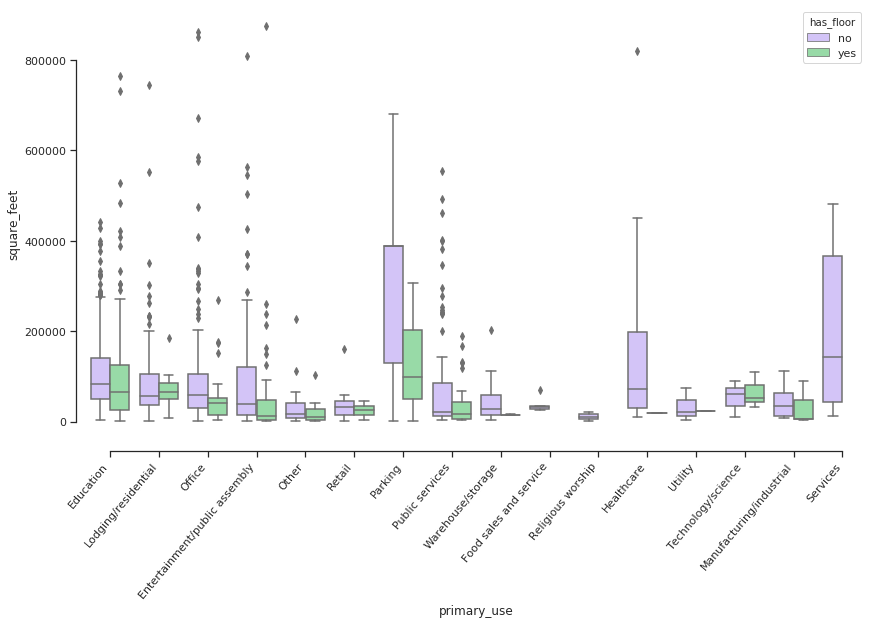

In [28]:
sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot
plt.figure(figsize=(14,8))
sns.boxplot(x="primary_use", y="square_feet",
            hue="has_floor", palette=["m", "g"],
            data=df_copy)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=50, horizontalalignment='right')

In [75]:
# TODO : separate has_floor in groups